<a href="https://colab.research.google.com/github/pranavkagrawal02/Minor-In-AI-IIT-Ropar/blob/main/Mar_18_z_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

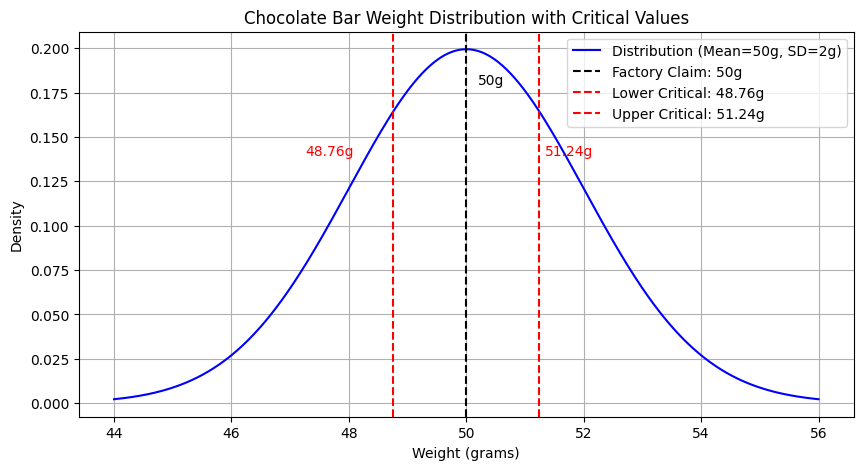

In [ ]:
# Problem
# A factory claims that the average weight of a chocolate bar is 50g.
# You take a sample of 10 bars, and the average weight is 52g with a standard deviation of 2g.

# You want to check if the sample shows a significant difference from 50g.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given data
population_mean = 50
sample_std = 2
sample_size = 10

# Calculate standard error and critical weights
standard_error = sample_std / np.sqrt(sample_size)
z_critical = 1.96  # For 95% confidence
lower_critical_weight = population_mean - z_critical * standard_error
upper_critical_weight = population_mean + z_critical * standard_error

# Create x values centered around population mean
x = np.linspace(44, 56, 500)
y = norm.pdf(x, population_mean, sample_std)

# Plot the bell curve
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='blue', label='Distribution (Mean=50g, SD=2g)')

# Mark population mean
plt.axvline(population_mean, color='black', linestyle='--', label='Factory Claim: 50g')

# Mark critical weight boundaries
plt.axvline(lower_critical_weight, color='red', linestyle='--', label=f'Lower Critical: {lower_critical_weight:.2f}g')
plt.axvline(upper_critical_weight, color='red', linestyle='--', label=f'Upper Critical: {upper_critical_weight:.2f}g')

# Add text for clarity
plt.text(population_mean+0.2, max(y)*0.9, '50g', color='black')
plt.text(lower_critical_weight-1.5, max(y)*0.7, f'{lower_critical_weight:.2f}g', color='red')
plt.text(upper_critical_weight+0.1, max(y)*0.7, f'{upper_critical_weight:.2f}g', color='red')

# Title and labels
plt.title('Chocolate Bar Weight Distribution with Critical Values')
plt.xlabel('Weight (grams)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# A factory claims that the average weight of a chocolate bar is 50g.
# You take a sample of 10 bars, and the average weight is 52g with a standard deviation of 2g.
# You want to check if the sample shows a significant difference from 50g.

# Given data
population_mean = 50  # Claimed average
sample_mean = 53      # Sample average
sample_std = 2        # Sample standard deviation
n = 10                # Sample size

# Step 1: Calculate standard error
standard_error = sample_std / (n ** 0.5)

# Step 2: Calculate z-score
z_score = (sample_mean - population_mean) / standard_error

# Step 3: Find critical z for 2-tailed test (alpha = 0.05)
from scipy.stats import norm
critical_z = norm.ppf(0.975)  # 95% confidence

# Step 4: Decision
if abs(z_score) > critical_z:
    print("Reject H₀: Significant difference")
else:
    print("Fail to Reject H₀: No significant difference")

print(f"Z-score: {z_score:.2f}, Critical Z: ±{critical_z:.2f}")


Reject H₀: Significant difference
Z-score: 4.74, Critical Z: ±1.96


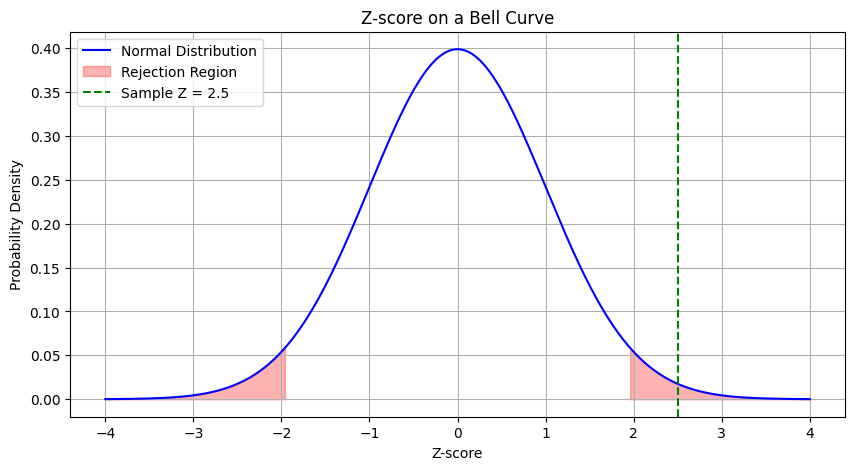

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Create x values for the bell curve
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Standard Normal Distribution: mean=0, std=1

# 2. Plot the bell curve
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Normal Distribution", color="blue")

# 3. Highlight the area beyond Z = ±1.96 (critical value for 95%)
z_critical = 1.96
x_fill_right = np.linspace(z_critical, 4, 100)
x_fill_left = np.linspace(-4, -z_critical, 100)

plt.fill_between(x_fill_right, norm.pdf(x_fill_right), color='red', alpha=0.3, label='Rejection Region')
plt.fill_between(x_fill_left, norm.pdf(x_fill_left), color='red', alpha=0.3)

# 4. Plot sample Z-score (example Z = 2.5)
z_sample = 2.5
plt.axvline(z_sample, color='green', linestyle='--', label=f"Sample Z = {z_sample}")

# 5. Labels and legend
plt.title("Z-score on a Bell Curve")
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# A factory claims the average length of a chocolate bar is 15 cm.
# You take a sample of 40 bars, and the average length is 15.05 cm with a sample standard deviation of 0.5 cm.
# You want to check if this tiny difference from 15 cm is significant or just due to chance.

# Null hypothesis (H₀) : mean length is 15cm (no significant difference)
# Alternate hypothesis (H₁): mean length is not 15cm (there is significant difference)

import scipy.stats as stats

# Given data
population_mean =  15         # Factory claim
sample_mean = 15.05           # Sample mean length
sample_std = 0.5              # Sample standard deviation
sample_size = 40              # Sample size > 30

# Step 1: Calculate Standard Error
standard_error = sample_std / (sample_size ** 0.5)

# Step 2: Calculate Z-score
z_score = (sample_mean - population_mean) / standard_error

# Step 3: Calculate p-value (two-tailed)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Step 4: Decision
alpha = 0.05  # 95% confidence level

print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value > alpha:
    print("Fail to reject the null hypothesis — No significant difference")
else:
    print("Reject Null - significant difference.")



Z-score: 0.63
P-value: 0.5271
Fail to reject the null hypothesis — No significant difference


In [ ]:
# A soda factory claims that the average volume of soda in a can is 330 ml.
# You take a sample of 40 cans and find that the sample mean is 328 ml with a sample standard deviation of 4 ml.
# You want to test if the cans have less soda than claimed (one-sided test).

# Null Hypothesis (H₀): Mean is 330ml (no difference, factory is right)
# Alternate Hypothesis (H₁): Mean is less than 330ml (cans have less soda)

import numpy as np
from scipy.stats import norm

# Given Data
population_mean = 330    # Claimed mean by factory
sample_mean = 328        # Sample mean
sample_std = 4           # Sample standard deviation
n =  40                  # Sample size
alpha = 0.05              # Significance level

# Step 1: Calculate z-score
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
print(f"Z-score: {z_score:.2f}")

# Step 2: Calculate p-value (one-tailed, left side)
p_value = norm.cdf(z_score)  # Since we are checking "less than"
print(f"P-value: {p_value:.4f}")

# Step 3: Decision
if p_value < alpha:
    print("Result: Reject the null hypothesis. Cans have less soda.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference.")


Z-score: -3.16
P-value: 0.0008
Result: Reject the null hypothesis. Cans have less soda.


Z-score: -3.16
P-value: 0.0008
Critical z-value: -1.64
Critical sample value: 328.96 ml


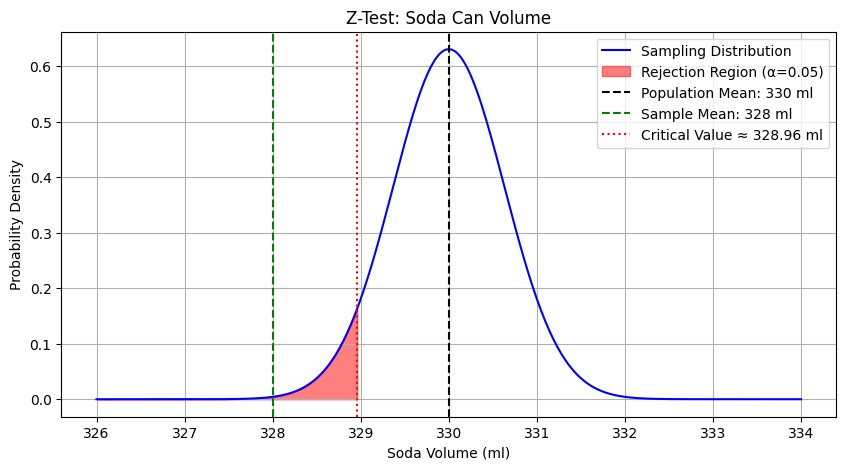

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given Data
population_mean = 330
sample_mean = 328
sample_std = 4
n = 40
alpha = 0.05

# Calculate z-score
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
p_value = norm.cdf(z_score)

# Critical z for left-tailed test (alpha = 0.05)
critical_z = norm.ppf(alpha)
critical_value = population_mean + critical_z * (sample_std / np.sqrt(n))

# Print results
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical z-value: {critical_z:.2f}")
print(f"Critical sample value: {critical_value:.2f} ml")

# Visualization
x = np.linspace(326, 334, 500)
y = norm.pdf(x, population_mean, sample_std / np.sqrt(n))

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sampling Distribution', color='blue')

# Shade rejection region (left tail)
x_fill = np.linspace(326, critical_value, 200)
y_fill = norm.pdf(x_fill, population_mean, sample_std / np.sqrt(n))
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Rejection Region (α=0.05)')

# Mark population mean
plt.axvline(population_mean, color='black', linestyle='--', label='Population Mean: 330 ml')

# Mark sample mean
plt.axvline(sample_mean, color='green', linestyle='--', label='Sample Mean: 328 ml')

# Mark critical value
plt.axvline(critical_value, color='red', linestyle=':', label=f'Critical Value ≈ {critical_value:.2f} ml')

# Labels and title
plt.title('Z-Test: Soda Can Volume')
plt.xlabel('Soda Volume (ml)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# A soda company claims that their cans contain 330 ml of soda.
# You suspect they might be overfilling the cans. You take a sample to check if the mean volume is greater than 330 ml.
# It turns out that the sample mean was 332 and sd = 4ml, sample = 40

# Null Hypothesis (H₀): Mean is 330ml
# Alternative Hypothesis (H₁): Mean is greater than 330ml (can are overfilled)

import numpy as np
from scipy.stats import norm

# Given Data
population_mean = 330
sample_mean = 332
sample_std = 4
n = 40
alpha = 0.05

# Step 1: Calculate z-score
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# Step 2: Calculate p-value (right-tailed)
p_value = 1 - norm.cdf(z_score)

# Output
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis: Evidence of overfilling.")
else:
    print("Fail to reject the null hypothesis: No significant overfilling.")


Z-score: 3.16
P-value: 0.0008
Reject the null hypothesis: Evidence of overfilling.


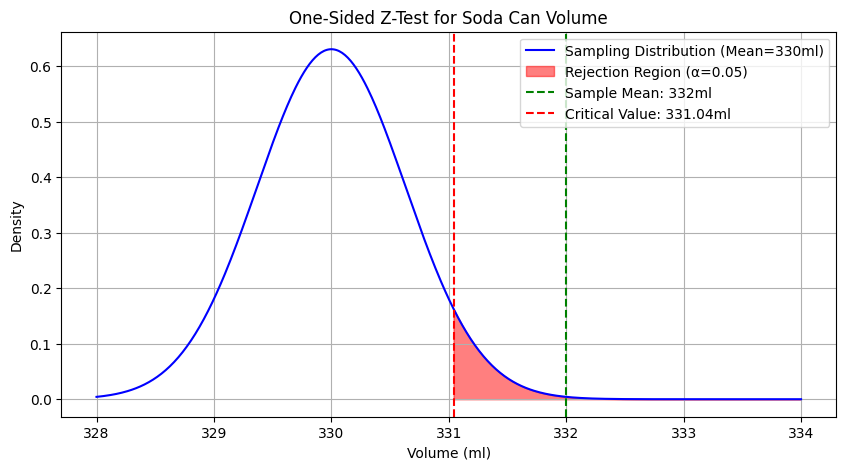

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given Data
population_mean = 330
sample_mean = 332
sample_std = 4
n = 40
alpha = 0.05

# Calculate z-score and critical value
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
critical_z = norm.ppf(1 - alpha)
critical_value = population_mean + critical_z * (sample_std / np.sqrt(n))

# Generate x values
x = np.linspace(328, 334, 500)
y = norm.pdf(x, population_mean, sample_std / np.sqrt(n))

# Plot the bell curve
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='blue', label='Sampling Distribution (Mean=330ml)')

# Shade rejection region (right tail)
x_crit = np.linspace(critical_value, x[-1], 100)
y_crit = norm.pdf(x_crit, population_mean, sample_std / np.sqrt(n))
plt.fill_between(x_crit, y_crit, color='red', alpha=0.5, label='Rejection Region (α=0.05)')

# Mark sample mean and critical value
plt.axvline(sample_mean, color='green', linestyle='--', label='Sample Mean: 332ml')
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value: {critical_value:.2f}ml')

# Add titles and labels
plt.title('One-Sided Z-Test for Soda Can Volume')
plt.xlabel('Volume (ml)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# A soda company claims the average volume per can is 330ml.
# A quality control team samples 50 cans, finds an average volume of 332ml, with a standard deviation of 1.5.
# Test whether the actual volume differs significantly from 330ml using a 5% significance level.

# Null Hypothesis (H₀): Mean is 330ml
# Alternative Hypothesis (H₁): Mean is not 330ml


import numpy as np
from scipy.stats import norm

# Given data
claimed_mean = 330
sample_mean = 332
sample_std = 1.5
n = 50
alpha = 0.05

# Step 1: Calculate z-score
z_score = (sample_mean - claimed_mean) / (sample_std / np.sqrt(n))

# Step 2: Calculate two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Step 3: Make decision using p-value
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis (significant difference).")
else:
    print("Conclusion: Fail to reject the null hypothesis (no significant difference).")

Z-score: 9.43
P-value: 0.0000
Conclusion: Reject the null hypothesis (significant difference).


Z-score: 9.43
P-value: 0.0000


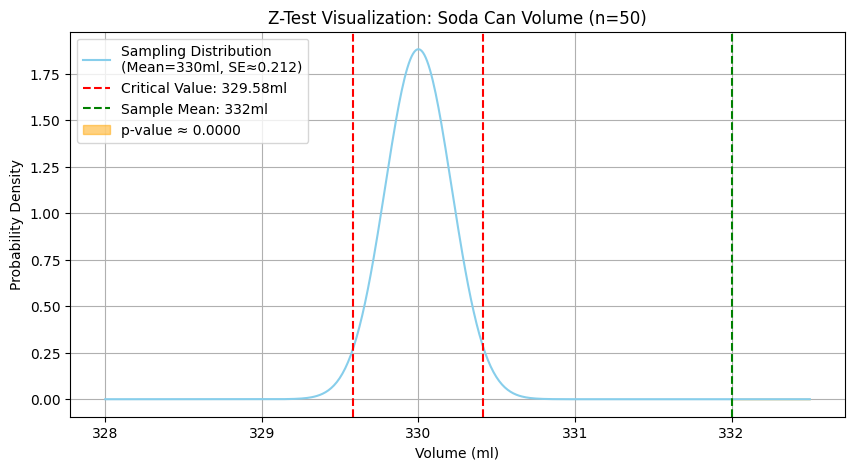

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given data
claimed_mean = 330
sample_mean = 332
sample_std = 1.5
n = 50
alpha = 0.05

# Calculate z-score and p-value
z_score = (sample_mean - claimed_mean) / (sample_std / np.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

# Critical z for two-tailed test
critical_z = norm.ppf(1 - alpha / 2)

# X range for curve
x = np.linspace(328, 332.5, 500)
y = norm.pdf(x, claimed_mean, sample_std / np.sqrt(n))

# Plot the bell curve
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sampling Distribution\n(Mean=330ml, SE≈0.212)', color='skyblue')

# Critical regions
left_critical = claimed_mean - critical_z * (sample_std / np.sqrt(n))
right_critical = claimed_mean + critical_z * (sample_std / np.sqrt(n))
plt.axvline(left_critical, color='red', linestyle='--', label=f'Critical Value: {left_critical:.2f}ml')
plt.axvline(right_critical, color='red', linestyle='--')

# Sample mean line
plt.axvline(sample_mean, color='green', linestyle='--', label=f'Sample Mean: {sample_mean}ml')

# Shade p-value area (right tail only for clarity)
x_shade = np.linspace(sample_mean, x[-1], 200)
y_shade = norm.pdf(x_shade, claimed_mean, sample_std / np.sqrt(n))
plt.fill_between(x_shade, y_shade, color='orange', alpha=0.5, label=f'p-value ≈ {p_value:.4f}')

# Labels and Title
plt.title('Z-Test Visualization: Soda Can Volume (n=50)')
plt.xlabel('Volume (ml)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# You trained a new AI image generator.  You claim your images are just as good as human-designed ones,
# which on average score 8.0/10 by users.
# You had 30 people rate your AI-generated images. The average rating was 7.6/10, with a standard deviation of 0.8.
# At α = 0.05, is your AI’s image quality significantly different from human-made ones?

# Test: 2-sided

# Null Hypothesis (H₀): Average rating of the AI related image is equal to the average rating of human desgined image
# Alternate Hypothesis (H₁): Average rating of the AI related image is NOT equal to the average rating of human desgined image

import numpy as np
from scipy.stats import norm

# Given data
claimed_mean = 8.0        # Human image average
sample_mean = 7.6         # AI image average
sample_std = 0.8
n = 30
alpha = 0.05

# Step 1: Compute z-score
z_score = (sample_mean - claimed_mean) / (sample_std / np.sqrt(n))

# Step 2: Compute p-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Step 3: Decision
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: AI's image quality is significantly different from humans.")
else:
    print("Fail to reject the null hypothesis: No significant difference in image quality.")


Z-score: -2.74
P-value: 0.0062
Reject the null hypothesis: AI's image quality is significantly different from humans.
